In [23]:
from prettytable import PrettyTable

# Sample data for three models
models = ["Prophet", "STL with MS", "XGBoost"]
rmse_values = [2.03, 2.00, 2.95]
mae_values = [1.57, 1.56, 1.40]

# Create a PrettyTable object
table = PrettyTable()

# Define column names and formatting
table.field_names = ["Model", "RMSE", "MAE"]
table.align["Model"] = "l"  # Left-align the model names
table.float_format = "2.2"   # Format numeric values to two decimal places

# Add data to the table
for model, rmse, mae in zip(models, rmse_values, mae_values):
    table.add_row([model, rmse, mae])

# Print the table
print(table)

+-------------+------+------+
| Model       | RMSE | MAE  |
+-------------+------+------+
| Prophet     | 2.03 | 1.57 |
| STL with MS | 2.00 | 1.56 |
| XGBoost     | 2.95 | 1.40 |
+-------------+------+------+


In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
path = '/Users/stathis/Desktop/UVA_master/Forecasting/FinalProject/'

dhr_results = pd.read_csv(path+"stl_results.csv",)

In [20]:
dhr_results

,.mean,item_id,date,sales
0,0.256354,FOODS_3_001,2016-04-25,1
1,0.557424,FOODS_3_001,2016-04-26,0
2,0.248833,FOODS_3_001,2016-04-27,0
3,0.221819,FOODS_3_001,2016-04-28,1
4,0.441924,FOODS_3_001,2016-04-29,0
...,...,...,...,...
23039,0.384102,FOODS_3_827,2016-05-18,1
23040,0.602312,FOODS_3_827,2016-05-19,0
23041,0.301142,FOODS_3_827,2016-05-20,4
23042,0.362529,FOODS_3_827,2016-05-21,1


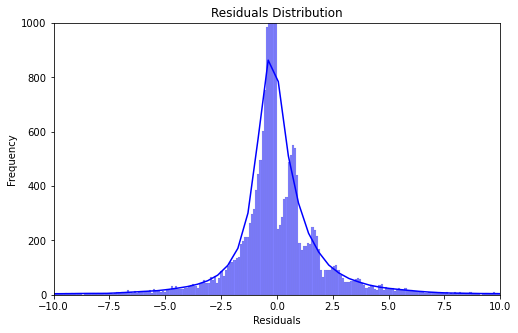

In [21]:
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


dhr_results['residuals'] = dhr_results['sales'] - dhr_results['.mean']


plt.figure(figsize=(8, 5)) 
sns.histplot(dhr_results['residuals'], kde=True, color='blue')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')


plt.xlim(-10, 10)  
plt.ylim(0, 1000)   

plt.show()


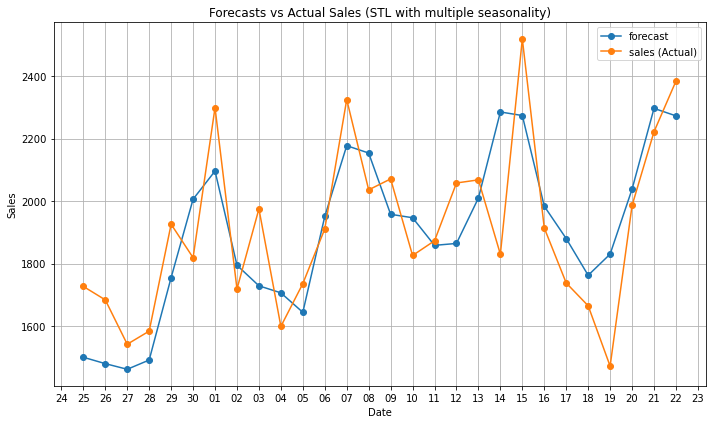

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


df = pd.DataFrame(dhr_results)

df.rename(columns={'.mean': 'forecast'}, inplace=True)
df.rename(columns={'sales.x': 'sales'}, inplace=True)

df['date'] = pd.to_datetime(df['date'])
grouped_df = df.groupby('date').agg({'sales': 'sum', 'forecast': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['date'], grouped_df['forecast'], label='forecast', marker='o')
plt.plot(grouped_df['date'], grouped_df['sales'], label='sales (Actual)', marker='o')

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())

plt.title('Forecasts vs Actual Sales (STL with multiple seasonality)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)  
plt.legend()
plt.tight_layout()  
plt.show()